### Loading and prerequesites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import statsmodels.api as sm

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
VARIANT = "FULL" # "SMALL", "MEDIUM" , "FULL"

if VARIANT == "SMALL":
    df = pd.read_pickle("../Data/df_no_topic.pkl")
    df = df.head(30)
elif VARIANT == "MEDIUM":
    df = pd.read_pickle("../Data/df_no_topic.pkl")
    df = df.head(500)
else:
    df = pd.read_pickle("../Data/df_no_topic.pkl")

### Load dataset

In [3]:
df_sentiment = pd.read_pickle("../Data/df_sentiment.pkl")

In [4]:
# Merge the two dataframes while keeping only the rows that appear in both dataframes and only retaining the columns nexis_id, publication_year, sentiment, positive, neutral, negative, sentences, text_x
df = pd.merge(df, df_sentiment, on="nexis_id", how="inner")
df = df[["nexis_id", "publication_year_y", "text_x", "sentiment", "positive", "neutral", "negative", "sentences"]]

# Rename the column publication_year_y to publication_year
df = df.rename(columns={"publication_year_y": "publication_year"})

# Rename the column text_x to text
df = df.rename(columns={"text_x": "text"})

df.head()

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
0,62M8K311JBN9708D0000000,2021,Transgourmet Der Grosshändler Transgourmet üb...,neutral,0.0,5.0,1.0,6.0
1,64VD9161JBN970430000000,2022,Leider wird bei solchen nachhaltigen Ernährung...,neutral,0.0,7.0,1.0,8.0
2,61FC83N1F0CCR19C0000000,2020,Brüssel (awp/sda/dpa) - Hanfprodukte mit Canna...,neutral,2.0,20.0,5.0,27.0
3,62MC3G61F0CCR4C20000000,2021,"Zürich (awp/sda/awp) - Freitag, 7. Mai 2021 ME...",neutral,3.0,76.0,1.0,80.0
4,64JYT131F0CCR3520000000,2022,Zürich (awp) - Die Coop-Tochter Transgourmet I...,neutral,0.0,5.0,0.0,5.0


### General overview

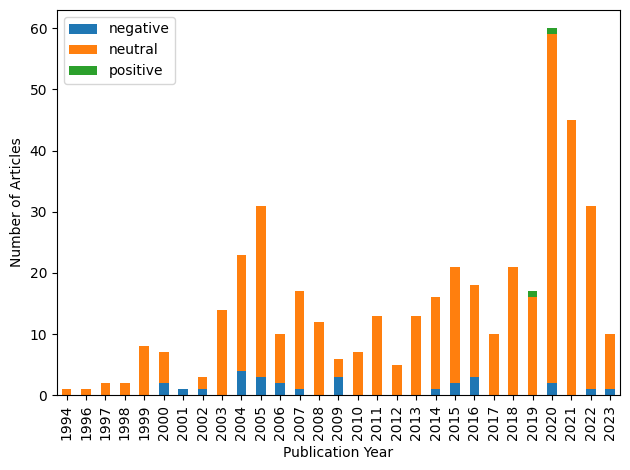

In [5]:
# Group the dataframe by publication_year and sentiment
grouped_df = df.groupby(['publication_year', 'sentiment']).size().unstack()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_no_topic_per_article_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.043
Model:                                  OLS   Adj. R-squared:                  0.008
Method:                       Least Squares   F-statistic:                     1.228
Date:                      Thu, 15 Feb 2024   Prob (F-statistic):              0.278
Time:                              13:59:22   Log-Likelihood:                 5.2134
No. Observations:                        29   AIC:                            -6.427
Df Residuals:                            27   BIC:                            -3.692
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

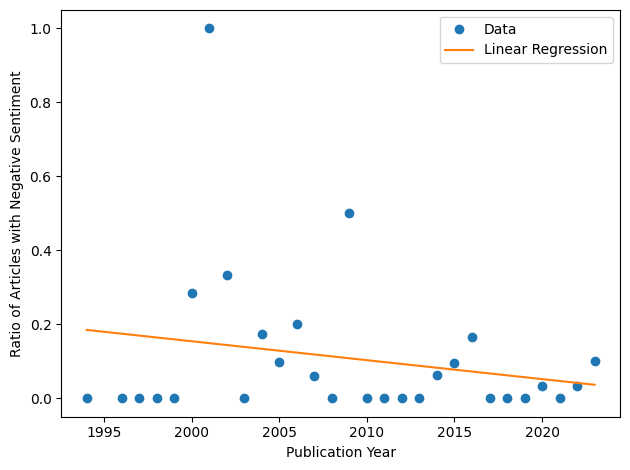

In [6]:
# Visualize the ratio of articles with negative sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with negative sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'negative').sum()})

# Calculate the ratio of articles with negative sentiment to total articles for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_no_topic_articles_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.082
Model:                                  OLS   Adj. R-squared:                  0.048
Method:                       Least Squares   F-statistic:                     2.418
Date:                      Thu, 15 Feb 2024   Prob (F-statistic):              0.132
Time:                              13:59:22   Log-Likelihood:                 90.747
No. Observations:                        29   AIC:                            -177.5
Df Residuals:                            27   BIC:                            -174.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

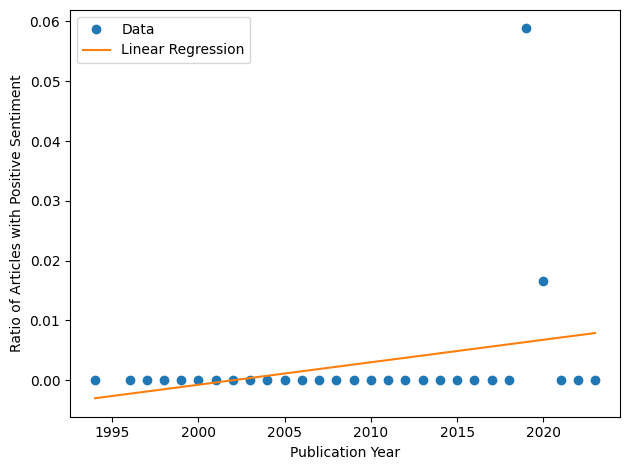

In [7]:
# Visualize the ratio of articles with positive sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with positive sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'positive').sum()})

# Calculate the ratio of articles with positive sentiment to total articles for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_no_topic_articles_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.038
Model:                                 OLS   Adj. R-squared:                  0.002
Method:                      Least Squares   F-statistic:                     1.058
Date:                     Thu, 15 Feb 2024   Prob (F-statistic):              0.313
Time:                             13:59:23   Log-Likelihood:                 5.2632
No. Observations:                       29   AIC:                            -6.526
Df Residuals:                           27   BIC:                            -3.792
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

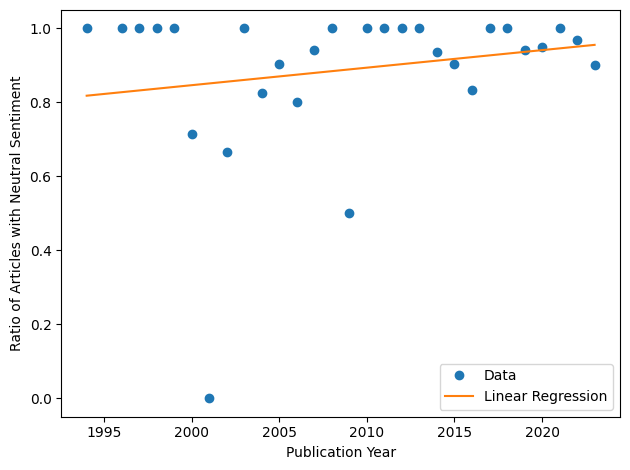

In [8]:
# Visualize the ratio of articles with neutral sentiment per year and fit a linear regression curve to the data
# Group by year and calculate the total number of articles and the number of articles with neutral sentiment for each year
df_grouped = df.groupby('publication_year').agg({'text': 'count', 'sentiment': lambda x: (x == 'neutral').sum()})

# Calculate the ratio of articles with neutral sentiment to total articles for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['sentiment'] / df_grouped['text']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Articles with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_no_topic_articles_ratio.png')
plt.show()

### Further analysis of positive articles

In [9]:
positive_articles = df[df['sentiment'] == 'positive']
positive_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
81,61FS4M51DY2BS22Y0000000,2020,"Es ist eine Weile her, dass sich alte Ideen vo...",positive,2.0,49.0,5.0,56.0
291,5VG33HV1F04J31GX0000000,2019,Die Vier gehen mit ganz unterschiedlichen Moti...,positive,1.0,21.0,1.0,23.0


### Further analysis of negative articles

In [10]:
negative_articles = df[df['sentiment'] == 'negative']
negative_articles

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
8,5Y0NS431DY2BS32W0000000,2020,"Nichts geliefert, nichts gesagt Im August habe...",negative,2.0,15.0,6.0,23.0
12,4NY9MRJ0TWX2722K0000000,2007,Die Mehrheit der Deutschen will kein Gen-Food....,negative,1.0,2.0,1.0,4.0
20,4GB4FXR0TWX2824H0000000,2004,Politiker machen es den Wählern manchmal wirkl...,negative,1.0,51.0,7.0,59.0
22,4H4YMN00TWX282T10000000,2005,"Frau Göring-Eckardt, was wollen Sie mit ihrem ...",negative,3.0,31.0,7.0,41.0
37,64TVF291DY2BS0VP0000000,2022,"""NZZ am Sonntag""/""SonntagsZeitung"": In der Cor...",negative,3.0,69.0,0.0,72.0
39,67H5KNP1JBKVT00B0000000,2023,"""In Deutschland war das Jahr 2022 in Bezug auf...",negative,0.0,15.0,1.0,16.0
58,7WRBVPW12RKCK5000000000,2009,Am Morgen danach hängen die grünen Luftballons...,negative,1.0,52.0,4.0,57.0
72,4G8WVG90TWCNF2F50000000,2005,"Beweise, daß es böse ist. Von Donna Leon. A. d...",negative,2.0,43.0,7.0,52.0
84,5KCSC951JDPTM3PT0000000,2016,"Heuser beklagt den ""Rückzug ins Nationale"". Es...",negative,1.0,35.0,0.0,36.0
91,7W17TTR12SK2G3VP0000000,2009,Doch im Diskurs der Angst spricht die politisc...,negative,0.0,4.0,1.0,5.0


### Analysis per sentence

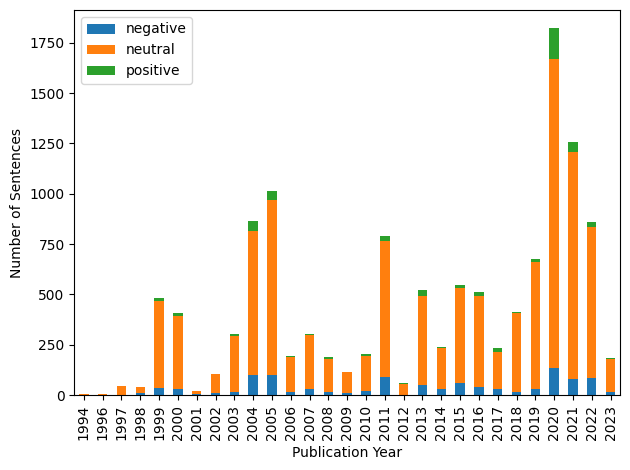

In [11]:
# Group the dataframe by publication_year and calculate the sum of positive, negative, and neutral values for each year
grouped_df = df.groupby('publication_year')[['negative', 'neutral', 'positive']].sum()

# Plot stacked bar chart
grouped_df.plot(kind='bar', stacked=True)

# Set labels and title
plt.xlabel('Publication Year')
plt.ylabel('Number of Sentences')

# Add a legend
plt.legend()

# Save the plot
plt.savefig('../Visuals/Sentiment_Topics/sentiment_no_topic_per_sentence_stacked_barchart.png')

# Show the plot
plt.show()

                               OLS Regression Results                               
Dep. Variable:     negative_sentiment_ratio   R-squared:                       0.200
Model:                                  OLS   Adj. R-squared:                  0.170
Method:                       Least Squares   F-statistic:                     6.752
Date:                      Thu, 15 Feb 2024   Prob (F-statistic):             0.0150
Time:                              13:59:23   Log-Likelihood:                 45.540
No. Observations:                        29   AIC:                            -87.08
Df Residuals:                            27   BIC:                            -84.35
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

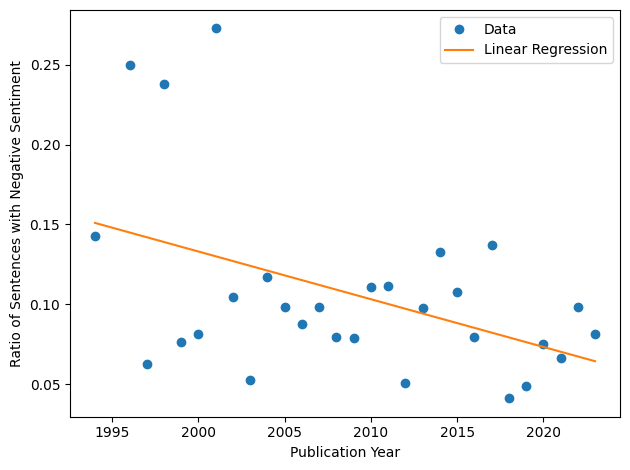

In [12]:
# Group by year and calculate the sum of negative and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'negative': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with negative sentiment to total sentences for each year
df_grouped['negative_sentiment_ratio'] = df_grouped['negative'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['negative_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Negative Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/negative_sentiment_no_topic_sentences_ratio.png')
plt.show()

                               OLS Regression Results                               
Dep. Variable:     positive_sentiment_ratio   R-squared:                       0.079
Model:                                  OLS   Adj. R-squared:                  0.045
Method:                       Least Squares   F-statistic:                     2.310
Date:                      Thu, 15 Feb 2024   Prob (F-statistic):              0.140
Time:                              13:59:24   Log-Likelihood:                 69.827
No. Observations:                        29   AIC:                            -135.7
Df Residuals:                            27   BIC:                            -132.9
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

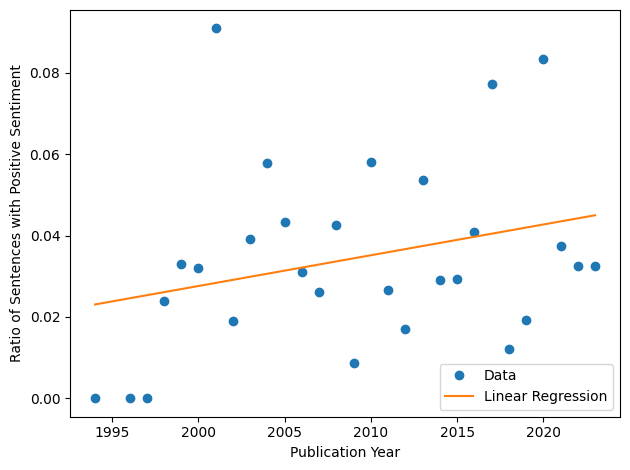

In [13]:
# Group by year and calculate the sum of positive and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'positive': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with positive sentiment to total sentences for each year
df_grouped['positive_sentiment_ratio'] = df_grouped['positive'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['positive_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Positive Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/positive_sentiment_no_topic_sentences_ratio.png')
plt.show()

                               OLS Regression Results                              
Dep. Variable:     neutral_sentiment_ratio   R-squared:                       0.085
Model:                                 OLS   Adj. R-squared:                  0.052
Method:                      Least Squares   F-statistic:                     2.522
Date:                     Thu, 15 Feb 2024   Prob (F-statistic):              0.124
Time:                             13:59:24   Log-Likelihood:                 39.725
No. Observations:                       29   AIC:                            -75.45
Df Residuals:                           27   BIC:                            -72.71
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

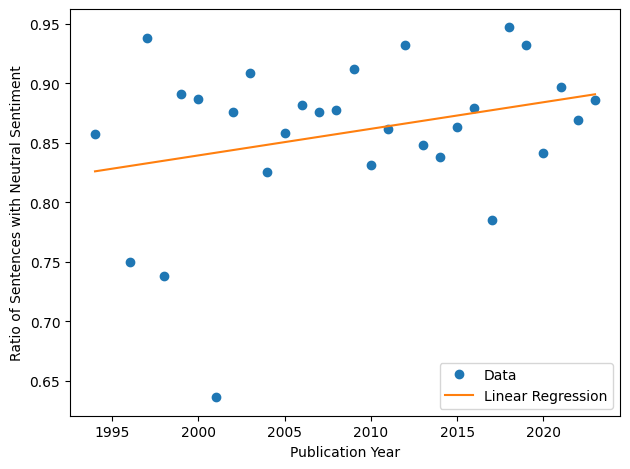

In [14]:
# Group by year and calculate the sum of neutral and total sentences for each year
df_grouped = df.groupby('publication_year').agg({'neutral': 'sum', 'sentences': 'sum'})

# Calculate the ratio of sentences with neutral sentiment to total sentences for each year
df_grouped['neutral_sentiment_ratio'] = df_grouped['neutral'] / df_grouped['sentences']

# Make the index a column
df_grouped.reset_index(inplace=True)

# Fit a linear regression curve to the data
X = sm.add_constant(df_grouped['publication_year'])
y = df_grouped['neutral_sentiment_ratio']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Print the confidence intervals for the coefficients
conf_int = results.conf_int()
print("\nConfidence Intervals for the Coefficients:")
print(conf_int)

# Plot the data points and the linear regression curve
plt.plot(df_grouped['publication_year'], y, 'o', label='Data')
plt.plot(df_grouped['publication_year'], results.predict(X), label='Linear Regression')
plt.xlabel('Publication Year')
plt.ylabel('Ratio of Sentences with Neutral Sentiment')
plt.legend()
plt.savefig('../Visuals/Sentiment_Topics/neutral_sentiment_no_topic_sentences_ratio.png')
plt.show()

### Explore anomalies

In [15]:
df_sorted = df.sort_values('positive', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
44,53H2GCD1DYK710Y00000000,2011,Nymphomanische Kroatinnen soll es am Strand vo...,neutral,16.0,408.0,63.0,487.0
418,59XM35H1JDRK82420000000,2013,Sie gilt als eine der einflussreichsten Persön...,neutral,16.0,149.0,29.0,194.0
154,4BR2FX70TWH7K2480000000,2004,FILME BAD HOMBURG Kaskade / Panda Taunus-Therm...,neutral,11.0,61.0,23.0,95.0
317,60428DG1F07Y90MF0000000,2020,Die European Industrial Hemp Association (EIHA...,neutral,10.0,43.0,6.0,59.0
283,5YBJBY41DYBW50KV0000000,2020,Bruessel/Koeln (ots) - Der European Industrial...,neutral,10.0,43.0,5.0,58.0
348,5YBHCFJ1F086F1070000000,2020,- Die European Industrial Hemp Association (EI...,neutral,10.0,53.0,3.0,66.0
162,4GV25TW0TWH7K3450000000,2005,Vortrag über Gen-Food Offenbach · 26. Juni · o...,neutral,10.0,28.0,2.0,40.0
369,4CDG2GK0TWBKB20V0000000,2004,Stuttgart ist ein einziges Versprechen. Die Pa...,neutral,10.0,52.0,13.0,75.0
349,5YHDPP61F086F3WG0000000,2020,- Bundesamt für Verbraucherschutz und Lebensmi...,neutral,9.0,18.0,2.0,29.0
133,3X0BTDR0004YT4260000000,1999,europas adel verliert seinen Glanz. Entspreche...,neutral,9.0,235.0,17.0,261.0


In [16]:
df_sorted = df.sort_values('negative', ascending=False)
df_sorted.head(50)

,nexis_id,publication_year,text,sentiment,positive,neutral,negative,sentences
44,53H2GCD1DYK710Y00000000,2011,Nymphomanische Kroatinnen soll es am Strand vo...,neutral,16.0,408.0,63.0,487.0
418,59XM35H1JDRK82420000000,2013,Sie gilt als eine der einflussreichsten Persön...,neutral,16.0,149.0,29.0,194.0
41,4GFC4PW0TWB9W2D30000000,2005,Die SPD und der Kanzler können einem fast leid...,neutral,7.0,31.0,26.0,64.0
154,4BR2FX70TWH7K2480000000,2004,FILME BAD HOMBURG Kaskade / Panda Taunus-Therm...,neutral,11.0,61.0,23.0,95.0
174,5PDVHVH1JBPW936C0000000,2017,"Herr Knop, Sie plädieren dafür, beim Essen auf...",neutral,3.0,54.0,18.0,75.0
331,53D2H851JCR7S4CC0000000,2011,Hochdruckemulgieren - Neue Prozesse und Produk...,neutral,3.0,133.0,18.0,154.0
385,640J7HK1JC81110M0000000,2021,Mit der dunklen Jahreszeit wächst bei vielen M...,neutral,1.0,66.0,17.0,84.0
133,3X0BTDR0004YT4260000000,1999,europas adel verliert seinen Glanz. Entspreche...,neutral,9.0,235.0,17.0,261.0
30,64WY9CD1JBK924G20000000,2022,Die US-Amerikaner reagieren damit auf eine gro...,neutral,3.0,51.0,16.0,70.0
398,5KKRJDS1JC3GN1N70000000,2016,Matthias Glarner hat seinen Sieg wahrlich verd...,negative,7.0,54.0,15.0,76.0


### Export 2020 data to csv

In [17]:
# Retain only publications from the year 2020 (COVID)
df_2020 = df[df['publication_year'] == 2020]

# Export the dataframe to a csv file while fixing the encoding for german characters and using tab as a separator
df_2020.to_csv('../Data/df_2020_no_topic.csv', sep='\t', encoding='utf-8-sig', index=False)

In [21]:
# Print all articles including the word "eiha" using spacy
nlp = spacy.load("de_core_news_sm")

for article in df_2020['text']:
    doc = nlp(article)
    for token in doc:
        if token.text.lower() == "eiha":
            print(article)
            # print the nexis_id of the article
            print(df_2020[df_2020['text'] == article]['nexis_id'])

Bruessel/Koeln (ots) - Der European Industrial Hemp Association (EIHA) ist ein richtungsweisender Erfolg in der Diskussion um den allgemein zulaessigen Handel und Verkauf von CBD-haltigen Produkten gelungen. Demnach haben sich die deutsche Bundesregierung sowie das Bundesministerium fuer Ernaehrung und Landwirtschaft (BMEL) eindeutig erkennbar der Auffassung der EIHA angeschlossen: Lebensmittel, die Teile der Hanfpflanze enthalten, sind grundsaetzlich keine "neuartigen" Lebensmittel i. S. d. der Verordnung (EU) 2015/2283. Das gilt allerdings nicht automatisch auch fuer isoliertes CBD (Cannabidiol) oder mit CBD angereicherte Extrakte. "Somit sind Hanflebensmittelprodukte aus traditionell hergestellten Extrakten mit dem natuerlichen Vollspektrum der in der Hanfpflanze enthaltenen Cannabinoide keine neuartigen Lebensmittel. Fuer die deutsche Hanflebensmittelindustrie ist diese Aussage der Regierung und des Ministeriums ein wichtiger Meilenstein", so Daniel Kruse, Praesident der EIHA. Ausl